Importing The Dependencies

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,recall_score
from sklearn.preprocessing import StandardScaler

Import Bostone House Prediction Database

In [251]:
house_price_dataset = pd.read_csv('Housing.csv')

In [252]:
print(house_price_dataset)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [253]:
# check for missing values
house_price_dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [254]:
# Statistical measure of Data
house_price_dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Change type numpy.narray to pd dataframe

In [255]:
house_price_dataframe = pd.DataFrame(house_price_dataset)
type(house_price_dataframe)

pandas.core.frame.DataFrame

In [256]:
house_price_dataframe.replace({"mainroad":{'yes':1,'no':0}},inplace=True)
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished


In [257]:
house_price_dataframe.replace({"guestroom":{'yes':1,'no':0}},inplace=True)
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,yes,no,yes,2,no,furnished


In [258]:
house_price_dataframe.replace({"basement":{'yes':1,'no':0}},inplace=True)
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,no,yes,2,no,furnished


In [259]:
house_price_dataframe.replace({"hotwaterheating":{'yes':1,'no':0}},inplace=True)
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,yes,2,no,furnished


In [260]:
house_price_dataframe.replace({"airconditioning":{'yes':1,'no':0}},inplace=True)
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,furnished


In [261]:
house_price_dataframe.replace({"prefarea":{'yes':1,'no':0}},inplace=True)
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [262]:
house_price_dataframe.replace({"furnishingstatus":{'furnished':0,'semi-furnished':1,'unfurnished':2}},inplace=True)
house_price_dataframe.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [263]:
house_price_dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Understanding the co relation of various features in dataset

1. Positive Corelation
2. Negative Corelation

In [264]:
corelation = house_price_dataframe.corr()

<Axes: >

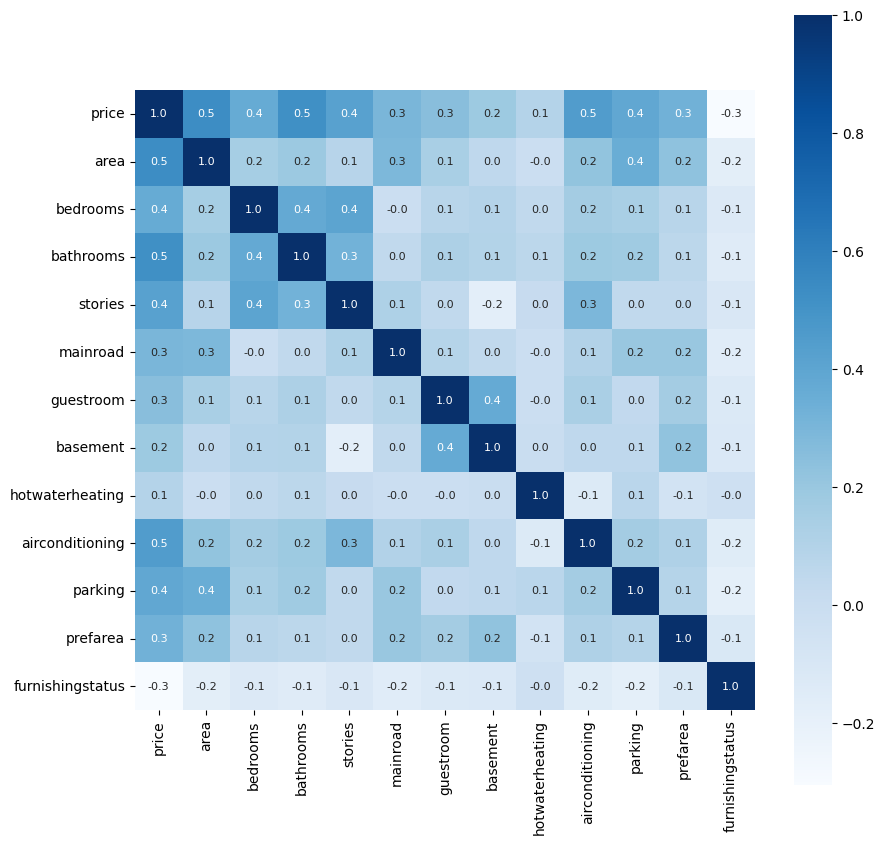

In [265]:
# constructing heat map to understanding the corelation
plt.figure(figsize=(10,10))
sns.heatmap(corelation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Spliting the data and target

In [266]:
X = house_price_dataframe.drop(['price'],axis=True)
Y = house_price_dataframe['price']

In [267]:
print(X)
print(Y)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

Splitting the data into Training data and Test data

In [268]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [269]:
print(X.shape,X_train.shape,X_test.shape)

(545, 12) (436, 12) (109, 12)


Model Train

XGBoost Regressor

In [270]:
# Loading the Model
model =  XGBRegressor()

In [271]:
# Training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [272]:
# accuracy on Training data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[ 3424222.   4270767.   2683287.   4791449.5  4129676.   6953162.
  2877948.2  2689605.   6933238.   4681389.5  3316203.8  2900007.8
  6003467.   5804279.   7766756.5  4123577.   5245065.   4591470.5
  7756017.5  4219297.5  4168722.2  2690382.2  5239920.5  4396851.
  3918579.2  4042381.   6799842.   9215863.   4642376.5  3237656.8
  3760464.   3075951.5  2362834.5  4035899.   4268145.   2839288.5
  4858737.5  3643904.8  1921622.5  7990241.5  4081057.2 12234883.
  8546704.   7393369.5  4020822.8  3205431.8  4303169.   3587664.
  3376537.5  2473200.5  5921071.   4051300.5  3857848.8  3180712.2
  4045365.2  5352052.   3652279.5  3790807.5  3622467.8  4138339.
  7544263.   4306240.5  5928919.   2996695.5  3796975.8  5526313.
  6702700.5  5857141.5  5406529.5  5620276.   3333574.2  3630378.8
  2862753.5  4958216.   5244960.5  3710378.8  5884058.   4211315.5
  6746079.5  5397818.   3119843.2  3564199.8  6575148.   4889165.5
  5866716.5  8390791.   2687594.   3291622.2  9790258.   4098177.5
 

In [273]:
# R Square error
score_1 = metrics.r2_score(Y_train,training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R Squared error : ",score_1)
print("Mean Absolute error : ",score_2)

R Squared error :  0.9968795625957642
Mean Absolute error :  59136.664277522934


Visual the actual and predicted prices

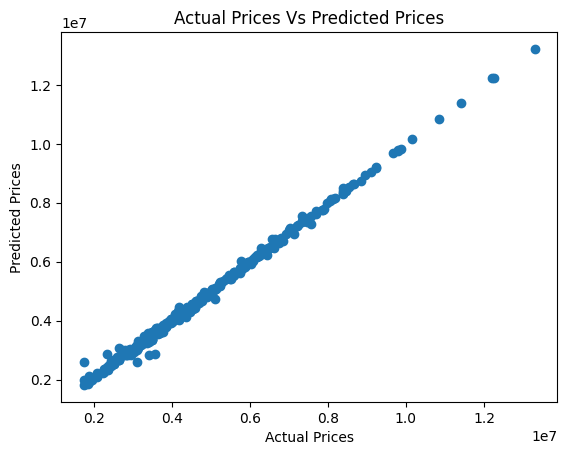

In [274]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

Prediction On Test Data

In [275]:
# accuracy on Test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[3296322.8 6333481.5 3268526.  3871901.8 5764505.  4375366.5 4457420.5
 2784207.8 2285271.2 4398212.5 3158940.2 3059939.8 3428927.5 4943586.
 5408992.  5937387.  6783901.5 4223072.5 3782949.8 4156774.8 4197882.5
 4010305.2 4639383.5 7306126.  2509731.5 3273827.  3063447.2 4257232.
 4516147.5 3394445.2 4530543.  3368979.  3589640.2 4707650.  3455856.5
 6796804.5 2925144.2 7837493.  6174778.5 2850364.5 5572208.  3065113.5
 3211285.2 4021368.2 2713857.  4343388.5 1923873.6 3384885.  4584499.5
 4888073.  8445018.  6250698.5 2588667.  3063447.2 3623950.  5687382.
 3988915.  4011009.2 2308448.8 6891495.5 3191297.5 3506775.8 4102978.
 6063622.  9096268.  6130588.5 3751586.5 4611452.  3169562.2 8186067.
 5093114.  4275010.5 5817635.5 5944356.  4628759.  5540796.5 6521929.5
 6018763.5 5863501.5 4748367.5 6074988.5 4130474.8 4436311.  2499738.8
 3618954.8 4484234.  8799350.  6888883.  3938319.2 4694266.  3921973.2
 5220827.5 4092208.2 8629927.  6180034.  4608977.5 8788389.  4583296.
 6084305.  3

In [276]:
# R Square error
score_1 = metrics.r2_score(Y_test,test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R Squared error : ",score_1)
print("Mean Absolute error : ",score_2)

R Squared error :  0.4463415529918807
Mean Absolute error :  948763.2901376147


Predicted

In [279]:
# Prepare the input data with the correct feature names
input_data = pd.DataFrame({
    'area': [7420],           # Area
    'bedrooms':[4],           # the number of bedrooms
    'bathrooms':[2],          # the number of bathrooms
    'stories': [3],           # the number of stories 
    'mainroad': [1],          # mainroad 1 for yes 0 for no
    'guestroom': [0],         # guestroom 1 for yes 0 for no 
    'basement': [0],          # basement 1 for yes 0 for no
    'hotwaterheating': [0],   # hotwaterheating 1 for yes 0 for no
    'airconditioning': [1],   # aircondion 1 for yes 0 for no
    'parking': [2],            # the number of parking  
    'prefarea': [1],          # prefare 1 for yes 0 for no  
    'furnishingstatus': [0],  # furnishingstatus 0 for furnished 1 for semi-furnished 2 for unfurnished
    # Include other features as well to match your training data
}, columns=X.columns)  # Use the same column names as your training data

# Use the trained model to make predictions
input_prediction = model.predict(input_data)
predicted_price = input_prediction[0]
print("Predicted Price:", predicted_price)


Predicted Price: 13217879.0
